# Convolutional NN

In [1]:
import numpy as np
import gzip
import os
import pickle
from matplotlib import pyplot

from src.si.data import Dataset
from src.si.util.util import to_categorical

Load the MNIST dataset

In [2]:
def load_mnist(sample_size=None):
    DIR = os.path.dirname(os.path.realpath('.'))
    filename = os.path.join(DIR, 'datasets/mnist.pkl.gz')
    f = gzip.open(filename, 'rb')
    data = pickle.load(f, encoding='bytes')
    (x_train, y_train), (x_test, y_test) = data
    if sample_size:
        return Dataset(x_train[:sample_size],y_train[:sample_size]),Dataset(x_test,y_test)
    else:
        return Dataset(x_train,y_train),Dataset(x_test,y_test)

In [3]:
train,test = load_mnist(500)

In [4]:
def preprocess(train):
    # reshape and normalize input data 
    train.X = train.X.reshape(train.X.shape[0], 28, 28, 1)
    train.X = train.X.astype('float32')
    train.X /= 255
    train.Y = to_categorical(train.Y)

In [5]:
preprocess(train)
preprocess(test)

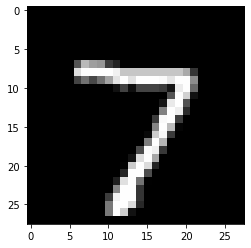

In [6]:
def plot_img(img,shape=(28,28)):
    pic = (img*255).reshape(shape)
    pic = pic.astype('int')
    pyplot.imshow(pic, cmap=pyplot.get_cmap('gray'))
    pyplot.show()

plot_img(test.X[0])

In [7]:
from si.supervised.nn import NN, Dense, Activation, Conv2D, Flatten
from si.util.activation import Tanh, Sigmoid

Build the model

In [8]:
net = NN(epochs=500,lr=0.1,verbose=True)
net.add(Conv2D((28, 28, 1), (3, 3), 1))
net.add(Activation(Tanh()))
net.add(Flatten())                     
net.add(Dense(26*26*1, 100))  # ao fazer a convolução
# a janela, que é 3x3, nao consegue passar na matriz inteira, nomeadamente
# nos ultimos dois elemenos, daí este dense passar a ser 26x26
net.add(Activation(Tanh()))
net.add(Dense(100, 10))                
net.add(Activation(Sigmoid()))

Train the model

In [9]:
net.fit(train)

epoch 1/500 error=0.35472528378426904
epoch 2/500 error=0.3457460656697645
epoch 3/500 error=0.3354456094213512
epoch 4/500 error=0.324313356478481
epoch 5/500 error=0.3131654784728791
epoch 6/500 error=0.302481622940845
epoch 7/500 error=0.29238825047194134
epoch 8/500 error=0.282797833705867
epoch 9/500 error=0.2734843067590248
epoch 10/500 error=0.2642080988093712
epoch 11/500 error=0.25478998336526254
epoch 12/500 error=0.2451055042556353
epoch 13/500 error=0.2350683151391392
epoch 14/500 error=0.2246225398095704
epoch 15/500 error=0.21374425398017358
epoch 16/500 error=0.2024496901368141
epoch 17/500 error=0.19080791190295127
epoch 18/500 error=0.178955450473858
epoch 19/500 error=0.16710878664931586
epoch 20/500 error=0.15556604126113452
epoch 21/500 error=0.1446837996590643
epoch 22/500 error=0.134819025968067
epoch 23/500 error=0.12624798563823786
epoch 24/500 error=0.11909987927315875
epoch 25/500 error=0.11334195452007471
epoch 26/500 error=0.10881907266213339
epoch 27/500 er

In [10]:
out = net.predict(test.X[0:3])
print("\n")
print("predicted values : ")
print(np.round(out), end="\n")
print("true values : ")
print(test.Y[0:3])



predicted values : 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
true values : 
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [11]:
conv = net.layers[0]

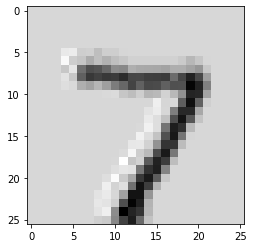

In [12]:
plot_img(conv.forward(test.X[:1]),shape=(26,26))

Add maxpooling layer

In [13]:
from src.si.supervised.nn import MaxPooling

net = NN(epochs=500,lr=0.1,verbose=True)
net.add(Conv2D((28, 28, 1), (3, 3), 1))  # sairá como 26*26*1
net.add(Activation(Tanh()))  # crash aqui logo no primeiro backpropagation
# ter em atenção  dimensão do pooling
net.add(MaxPooling((2, 2)))  # esta esta a correr, sairá como 13*13*1
net.add(Activation(Tanh()))
net.add(Flatten())  # fica um vetor 1D
net.add(Dense(13*13*1, 100))
net.add(Activation(Tanh()))
net.add(Dense(100, 10))
net.add(Activation(Sigmoid()))

Train model again

epoch 1/500 error=0.3431869118028684
epoch 2/500 error=0.21559440695038684
epoch 3/500 error=0.20834536519128416
epoch 4/500 error=0.20213849581460935
epoch 5/500 error=0.19678185538100057
epoch 6/500 error=0.19203468500918067
epoch 7/500 error=0.1876816073963706
epoch 8/500 error=0.18356798399531027
epoch 9/500 error=0.17960932197463425
epoch 10/500 error=0.17574922968123924
epoch 11/500 error=0.17195836716953355
epoch 12/500 error=0.16822534097258374
epoch 13/500 error=0.16454047227630092
epoch 14/500 error=0.16089821558142625
epoch 15/500 error=0.1572942178911711
epoch 16/500 error=0.15372799995462444
epoch 17/500 error=0.15020007560292822
epoch 18/500 error=0.14671501394595415
epoch 19/500 error=0.14327559441051307
epoch 20/500 error=0.13988788303432634
epoch 21/500 error=0.1365615685660228
epoch 22/500 error=0.13330734689162457
epoch 23/500 error=0.13013672436341853
epoch 24/500 error=0.12706412313851984
epoch 25/500 error=0.124105150963122
epoch 26/500 error=0.12127497170251908
e

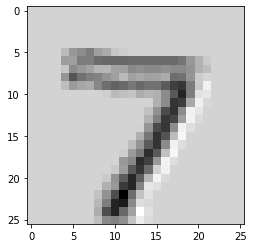

In [14]:
net.fit(train)

conv = net.layers[0]

plot_img(conv.forward(test.X[:1]),shape=(26,26))